In [25]:
!pip install yfinance --upgrade --no-cache-dir
!pip install mysql-connector-python
!pip install requests_html
!pip install yahoo_fin
!pip install plotly
!pip install finplot
!pip install technic
!pip install matplotlib
!pip insall keras
!pip install sklearn
import finplot as fplt
import matplotlib.dates as mpl_dates
import mysql.connector as mysql
import math
import os, sys
!pip install --upgrade pandas-datareader
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
from selenium import webdriver
import pandas_datareader as pdr
import numpy as np
import pandas as pd
from datetime import date
from datetime import date, timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import yfinance as yf
import sys
from termcolor import cprint
import seaborn as sns
import plotly.graph_objects as go
import decimal
from decimal import Decimal
from yahoo_fin import stock_info as si
from yahoo_fin.stock_info import get_analysts_info
plt.style.use('fivethirtyeight')
import random
from yahoo_fin import stock_info as si
import random

ERROR: unknown command "insall" - maybe you meant "install"
Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,255 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,235 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetc

In [39]:
df1 = pd.DataFrame(si.tickers_dow() )
df2 = pd.DataFrame(si.tickers_nasdaq() )
df3 = pd.DataFrame(si.tickers_sp500() )

df5 = pd.DataFrame(si.tickers_other() )
sym1 = set( symbol for symbol in df1[0].values.tolist() )
sym2 = set( symbol for symbol in df2[0].values.tolist() )
sym3 = set( symbol for symbol in df3[0].values.tolist() )

sym5 = set( symbol for symbol in df5[0].values.tolist() )
symbols = set.union( sym1, sym2, sym3, sym5 )
my_list = ['W', 'R', 'P', 'Q']
del_set = set()
sav_set = set()
for symbol in symbols:
    if len( symbol ) > 4 and symbol[-1] in my_list:
        del_set.add( symbol )
    else:
        sav_set.add( symbol )
sto = list(sav_set)
#sto = str(sav_set)
print( f'Removed {len( del_set )} unqualified stock symbols...' )
print( f'There are {len( sav_set )} qualified stock symbols...' )
print(sto)
import random
random.shuffle(sto)
rans = sto[2]
print(rans)
ranst = rans.replace("$", "-")
    #ransto

ransto = str(ranst)
ransto

#sp500.index
#sp500.drop(['Open', 'High', 'Low', 'Dividends', 'Volume','Stock Splits'],axis=1,inplace=True)

Removed 832 unqualified stock symbols...
There are 10454 qualified stock symbols...
['', 'PSI', 'PFX', 'TRDA', 'CRIT', 'BBW', 'ENER', 'TARA', 'PJT', 'LITB', 'AMTR', 'HRZN', 'OCC', 'ANDE', 'DELL', 'NPCT', 'JCSE', 'SNPO', 'ONON', 'UNOV', 'CCBG', 'MGTX', 'TEVA', 'MTEK', 'STM', 'BCAN', 'GUG', 'GAL', 'FSV', 'KMI', 'GLV', 'TOTR', 'AZPN', 'DMCY', 'GDE', 'UFPI', 'JAKK', 'RARE', 'VERI', 'STCN', 'GDOC', 'LNW', 'HAIN', 'LCR', 'TBX', 'IQM', 'ONLN', 'MLPR', 'FLFVU', 'SRTS', 'VCLT', 'GWH', 'SAEF', 'PTVE', 'DRUP', 'IPO', 'NVMI', 'CERT', 'ASGN', 'MCACU', 'EFU', 'NGD', 'ZDGE', 'IYC', 'XVOL', 'FAPR', 'FONR', 'DMF', 'SHNY', 'CRVL', 'ECPG', 'BMY', 'EME', 'RY$T', 'ZWS', 'ABR$E', 'PDT', 'CRDF', 'AAON', 'CMRA', 'SQLV', 'BXP', 'NU', 'SACC', 'ROSC', 'ICF', 'DEO', 'CBRE', 'FAS', 'MRNS', 'KXIN', 'GOLF', 'RENB', 'NAUT', 'SCVL', 'TBBK', 'TRONU', 'LNSR', 'BRACU', 'KAR', 'IMAQU', 'VAXX', 'RIET', 'FDP', 'THW', 'MTUL', 'ELWS', 'CMSC', 'RGT', 'TATT', 'BTU', 'USL', 'CCSI', 'CRUZ', 'THCP', 'ARTEU', 'JHMD', 'JKS', 'VINC',

'PHYT'

In [40]:
#sp500 = yf.Ticker(ransto)
sp500 = yf.Ticker("AAPL")
sp500 = sp500.history(period="max")

import os
del sp500["Dividends"]
del sp500["Stock Splits"]
sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500 = sp500.loc["1990-01-01":].copy()
model = RandomForestClassifier(n_estimators=100,min_samples_split=100,random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close","Volume","Open","High","Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [41]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,0.249599,0.265531,0.247829,0.263761,183198400,0.265531,1
1990-01-03 00:00:00-05:00,0.269072,0.269072,0.265531,0.265531,207995200,0.266417,1
1990-01-04 00:00:00-05:00,0.270842,0.274382,0.263761,0.266417,221513600,0.267302,1
1990-01-05 00:00:00-05:00,0.267302,0.270842,0.261991,0.267302,123312000,0.269072,1
1990-01-08 00:00:00-05:00,0.265531,0.269072,0.261991,0.269072,101572800,0.266417,0
...,...,...,...,...,...,...,...
2023-09-07 00:00:00-04:00,175.179993,178.210007,173.539993,177.559998,112488800,178.179993,1
2023-09-08 00:00:00-04:00,178.350006,180.240005,177.789993,178.179993,65551300,179.360001,1
2023-09-11 00:00:00-04:00,180.070007,180.300003,177.339996,179.360001,58953100,176.300003,0


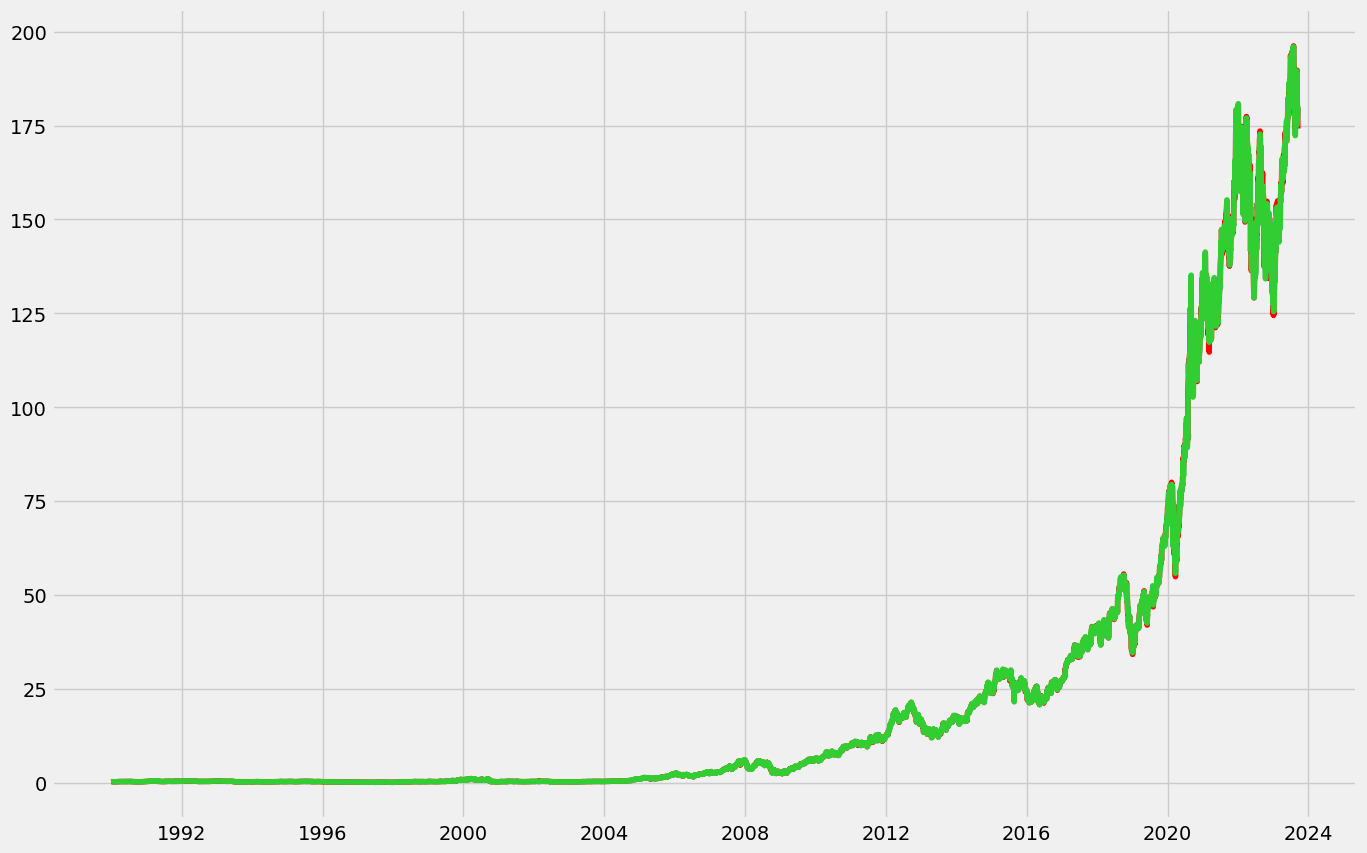

In [42]:
plt.figure(figsize= (15,10))
plt.plot(sp500.Close, color = 'red')
plt.plot(sp500.Open , color = 'limegreen')

plt.show()




In [43]:
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)


0.5714285714285714

In [44]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [45]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [46]:
predictions = backtest(sp500, model, predictors)

In [47]:
predictions["Predictions"].value_counts()

0    4113
1    1877
Name: Predictions, dtype: int64

In [48]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5215769845498135

In [49]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.521202
0    0.478798
Name: Target, dtype: float64

In [50]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors+= [ratio_column, trend_column]

In [51]:
sp500 = sp500.dropna(subset=sp500.columns[sp500.columns != "Tomorrow"])

In [52]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,0.216126,0.219820,0.214279,0.215202,293664000,0.219820,1,0.993604,1.0,0.978993,1.0,1.007241,22.0,0.694752,111.0,0.637248,462.0
1993-12-15 00:00:00-05:00,0.214279,0.219820,0.214279,0.219820,123883200,0.217049,0,1.010615,1.0,1.014492,2.0,1.025698,23.0,0.711547,111.0,0.651010,462.0
1993-12-16 00:00:00-05:00,0.217973,0.219820,0.214279,0.217049,126369600,0.217973,1,0.993658,1.0,1.005994,2.0,1.010467,22.0,0.704569,110.0,0.642898,461.0
1993-12-17 00:00:00-05:00,0.217973,0.219820,0.215202,0.217973,145152000,0.210584,0,1.002123,1.0,1.001698,3.0,1.011960,23.0,0.709636,110.0,0.645728,461.0
1993-12-20 00:00:00-05:00,0.216126,0.219820,0.208737,0.210584,189033600,0.203195,0,0.982758,1.0,0.974358,2.0,0.975652,22.0,0.687598,110.0,0.623946,460.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-07 00:00:00-04:00,175.179993,178.210007,173.539993,177.559998,112488800,178.179993,1,0.985158,0.0,0.957197,3.0,0.953827,33.0,1.109057,132.0,1.360984,530.0
2023-09-08 00:00:00-04:00,178.350006,180.240005,177.789993,178.179993,65551300,179.360001,1,1.001743,1.0,0.970680,3.0,0.957576,34.0,1.112326,132.0,1.364439,530.0
2023-09-11 00:00:00-04:00,180.070007,180.300003,177.339996,179.360001,58953100,176.300003,0,1.003300,2.0,0.987981,3.0,0.964293,34.0,1.119220,132.0,1.372155,531.0


In [53]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [54]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [55]:
predictions = backtest(sp500, model, new_predictors)

In [56]:
predictions["Predictions"].value_counts()

0.0    4476
1.0     514
Name: Predictions, dtype: int64

In [57]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5369649805447471

In [58]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.530261
0    0.469739
Name: Target, dtype: float64

In [59]:
predictions

,Target,Predictions
Date,,
2003-11-14 00:00:00-05:00,0,0.0
2003-11-17 00:00:00-05:00,0,0.0
2003-11-18 00:00:00-05:00,1,0.0
2003-11-19 00:00:00-05:00,0,0.0
2003-11-20 00:00:00-05:00,0,0.0
...,...,...
2023-09-07 00:00:00-04:00,1,1.0
2023-09-08 00:00:00-04:00,1,0.0
2023-09-11 00:00:00-04:00,0,0.0
